# 🥖 빵

당신은 매일 아침 동네 빵집에서 식빵을 구입해왔다.  

이 식빵의 무게는 500g이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 500g이 맞는 지 의구심이 들기 시작한다.  
그래서 1개월 간 식빵을 사온 뒤 매일 무게를 기록하였고, 그 결과는 bread 데이터셋으로 저장하였다.  

25일간 측정한 빵의 평균 무게는 480g이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

In [2]:
from hossam import load_data
from scipy.stats import t, ttest_1samp, normaltest
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt
import numpy as np

In [6]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin=load_data('bread')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10/bread.xlsx
[desc] 매일 아침 동네 빵집에서 식빵을 구입해 무게를 기록한 데이터
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (25, 1)
행 개수 : 25개
열 개수 : 1개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   무게      25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes
None


,무게
0,482
1,479
2,485
3,474
4,479


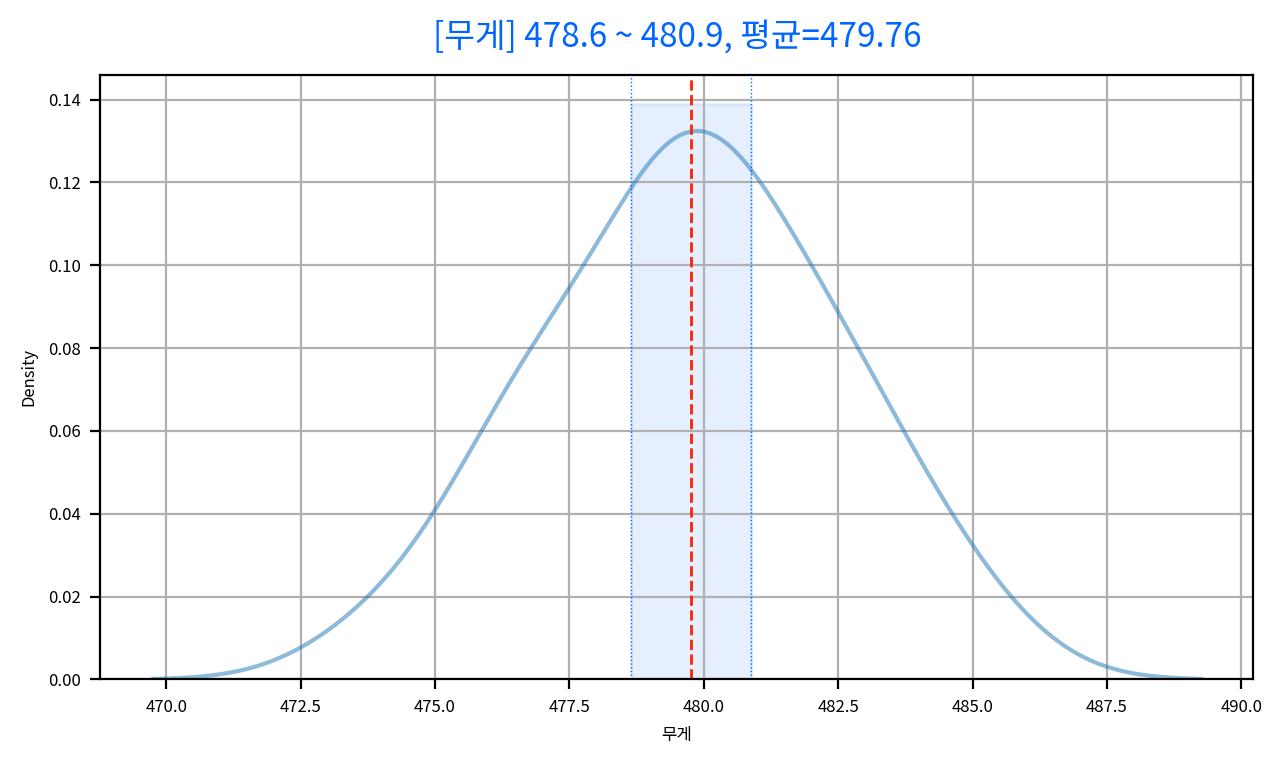

In [7]:
clevel=0.95
data=origin['무게']
n=len(data)
dof=n-1
sample_mean=data.mean()
sample_std=data.std()
sample_std_error=sample_std/sqrt(n)
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


sb.kdeplot(data=data, fill=False, alpha=0.5)

ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#0066ff', linewidth=0.5)

ymin, ymax=ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#0066ff88')

ax.axvline(sample_mean, linestyle='--', color='#ff2200', linewidth=1)

ax.grid(True)
ax.set_title(f'[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균={sample_mean:0.2f}', color='#0066ff', fontsize=12, fontweight=1000, pad=10)


plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [8]:
s, p=normaltest(origin['무게'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s,p,p>0.05)

'statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True'

In [11]:
s, p=ttest_1samp(origin['무게'], 500)
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: -37.524, p-value: 0.000, 대립가설 채택'